**MOUNT GOOGLE DRIVE**

In [ ]:
import google.colab
import drive
drive.mount('/content/drive')



**Importing Pandas Dataset**

In [7]:
import pandas as pd
import numpy
import matplotlib

import zipfile
import os

zip_path = "/content/drive/MyDrive/AI-Lab/NSL-KDD.zip"
extract_path = "/content/drive/MyDrive/AI-Lab/NSL-KDD"

# unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted files:", os.listdir(extract_path))


file_path = extract_path + "/KDDTrain+.txt"
df_train = pd.read_csv(file_path, header=None)

print(df_train.shape)
print(df_train.head())
print(df_train.isnull().values.any())
print(df_train.duplicated().any())




Extracted files: ['KDDTest+.arff', 'KDDTest+.txt', 'KDDTest-21.arff', 'KDDTest-21.txt', 'KDDTest1.jpg', 'KDDTrain+.arff', 'KDDTrain+.txt', 'KDDTrain+_20Percent.arff', 'KDDTrain+_20Percent.txt', 'KDDTrain1.jpg', 'index.html', 'nsl-kdd']
(125973, 43)
   0    1         2   3    4     5   6   7   8   9   ...    33    34    35  \
0   0  tcp  ftp_data  SF  491     0   0   0   0   0  ...  0.17  0.03  0.17   
1   0  udp     other  SF  146     0   0   0   0   0  ...  0.00  0.60  0.88   
2   0  tcp   private  S0    0     0   0   0   0   0  ...  0.10  0.05  0.00   
3   0  tcp      http  SF  232  8153   0   0   0   0  ...  1.00  0.00  0.03   
4   0  tcp      http  SF  199   420   0   0   0   0  ...  1.00  0.00  0.00   

     36    37    38    39    40       41  42  
0  0.00  0.00  0.00  0.05  0.00   normal  20  
1  0.00  0.00  0.00  0.00  0.00   normal  15  
2  0.00  1.00  1.00  0.00  0.00  neptune  19  
3  0.04  0.03  0.01  0.00  0.01   normal  21  
4  0.00  0.00  0.00  0.00  0.00   normal  21  


**Line Chart**

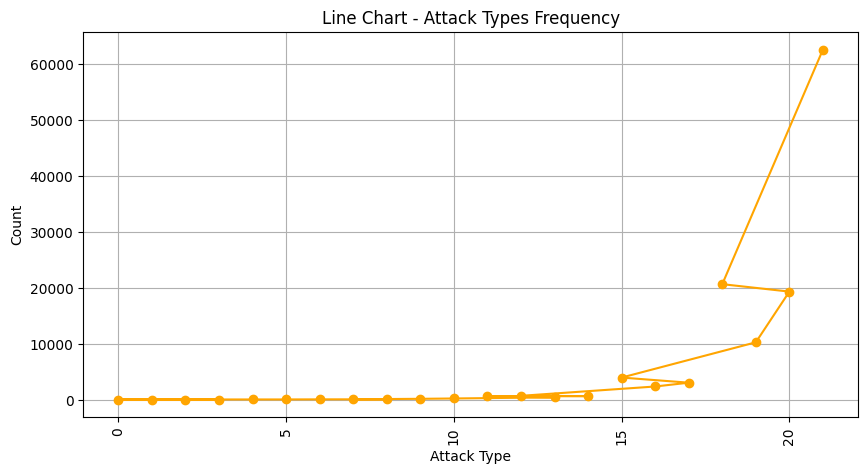

In [9]:
import matplotlib.pyplot as plt

# The label column is usually the last one
label_counts = df_train[df_train.columns[-1]].value_counts()

plt.figure(figsize=(10,5))
plt.plot(label_counts.index, label_counts.values, marker='o', linestyle='-', color='orange')

plt.title("Line Chart - Attack Types Frequency")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()



**Bar Chart**

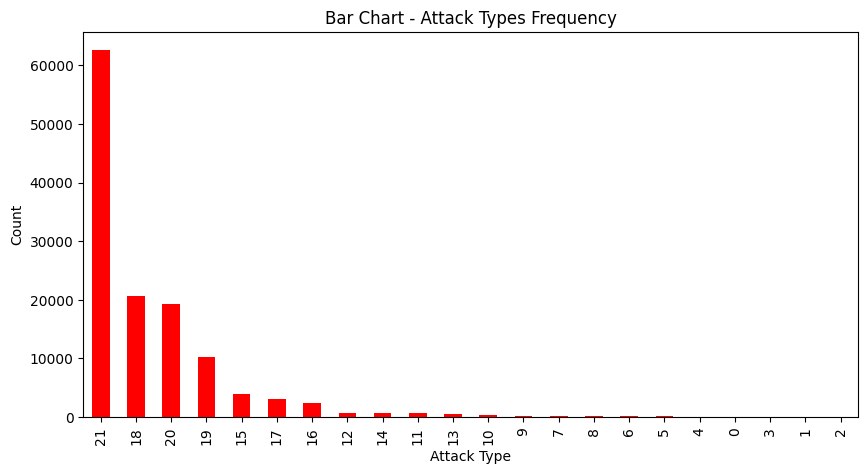

In [11]:
label_counts.plot(kind='bar', figsize=(10,5), color='red')
plt.title("Bar Chart - Attack Types Frequency")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.show()


**Pie Chart**

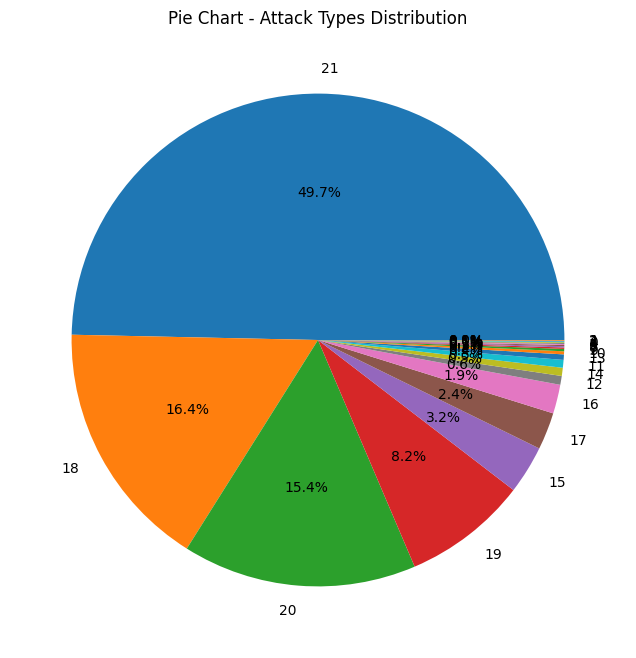

In [12]:
label_counts.plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')
plt.title("Pie Chart - Attack Types Distribution")
plt.ylabel("")  # hide y-label
plt.show()


**Testing,Training Validation**

In [15]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step B: Temp -> Validation (15%) + Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)  # ⚠ no stratify here (some classes too small)

# ======================================
# 6. Show results
# ======================================
print("\n✅ Final Split:")
print("Training set:", X_train.shape, " Labels:", y_train.shape)
print("Validation set:", X_val.shape, " Labels:", y_val.shape)
print("Testing set:", X_test.shape, " Labels:", y_test.shape)

print("\nSample label distribution (train):")
print(y_train.value_counts().head())


✅ Final Split:
Training set: (88181, 42)  Labels: (88181,)
Validation set: (18896, 42)  Labels: (18896,)
Testing set: (18896, 42)  Labels: (18896,)

Sample label distribution (train):
41
normal       47140
neptune      28850
satan         2543
ipsweep       2519
portsweep     2052
Name: count, dtype: int64
